In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version = 1)

C:\Users\chaud\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:56: RuntimeWarning: Invalid cache, redownloading file
  warn("Invalid cache, redownloading file", RuntimeWarning)


RemoteDisconnected: Remote end closed connection without response

C:\Users\chaud\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


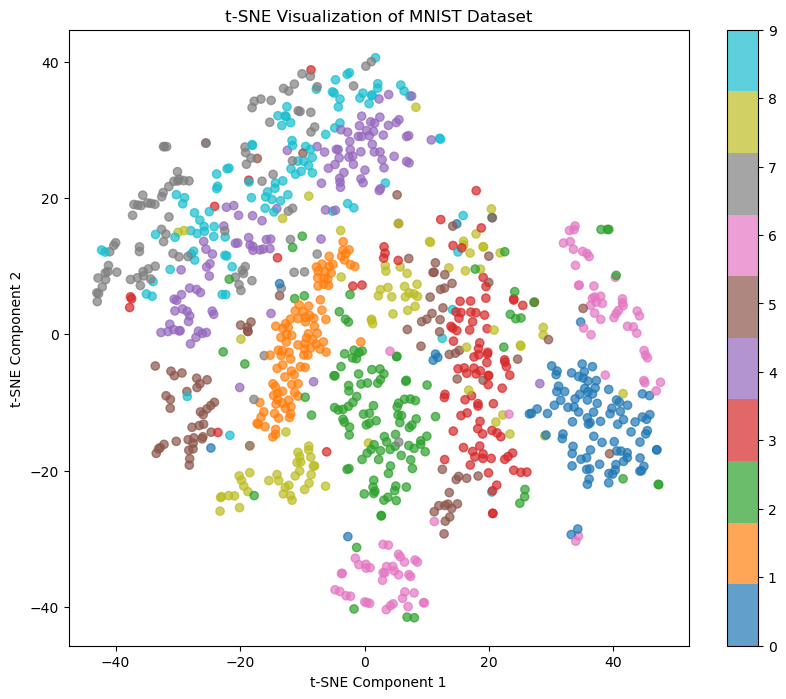

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)

# Subsample for faster computation (use full dataset if desired, but it takes longer)
n_samples = 1000
indices = np.random.choice(len(X), n_samples, replace=False)
X_sub = X[indices]
y_sub = y[indices]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sub)

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Plot the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_sub, cmap='tab10', alpha=0.7)
plt.colorbar(scatter, ticks=range(10))
plt.title('t-SNE Visualization of MNIST Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


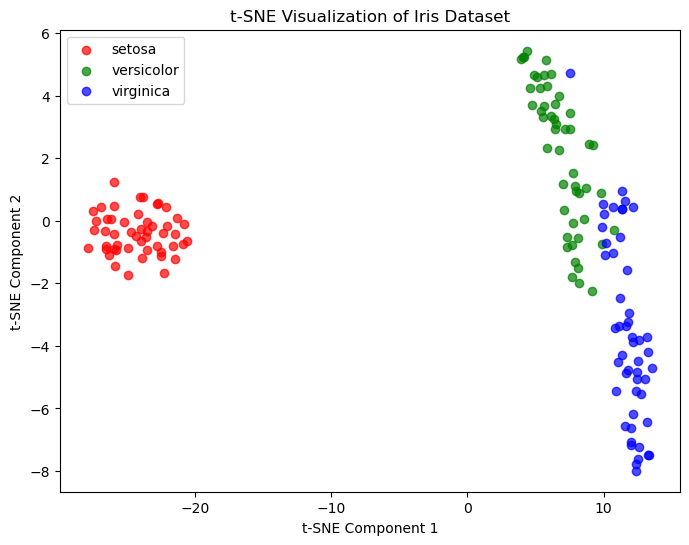

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot the results
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
species = ['setosa', 'versicolor', 'virginica']
for i, color in enumerate(colors):
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], c=color, label=species[i], alpha=0.7)
plt.title('t-SNE Visualization of Iris Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()


Dataset shape: (150, 5)

Class distribution:
0    50
1    50
2    50
Name: species, dtype: int64

Summary statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  

Correlation matrix:
                   sepal length (cm)  sep

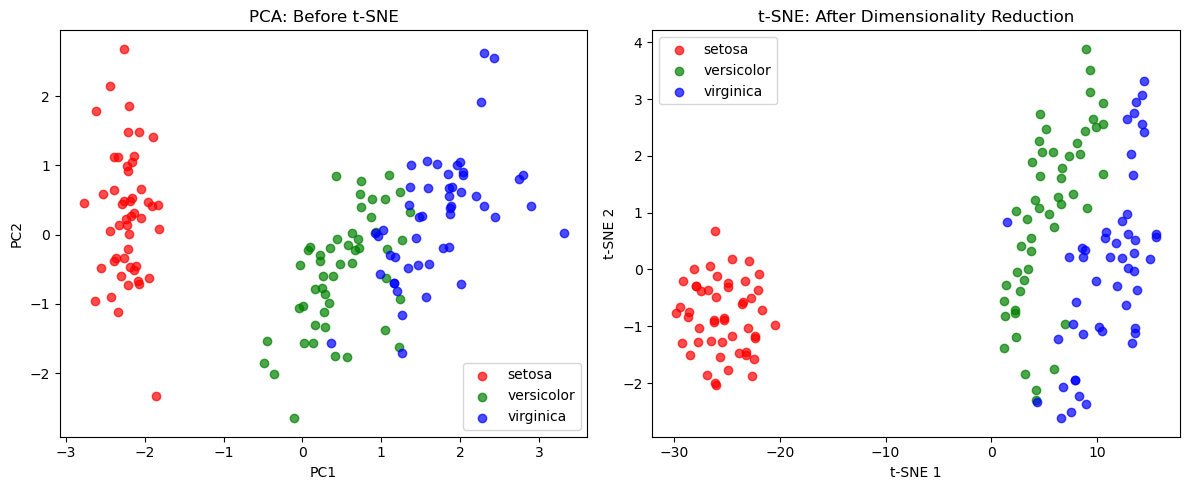

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
species = iris.target_names

# Exploration: Create DataFrame and print summaries
df = pd.DataFrame(X, columns=feature_names)
df['species'] = y
print("Dataset shape:", df.shape)
print("\nClass distribution:")
print(df['species'].value_counts().sort_index())
print("\nSummary statistics:")
print(df[feature_names].describe())
print("\nCorrelation matrix:")
print(df[feature_names].corr())

# Standardize data for better performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Before t-SNE: PCA visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
colors = ['red', 'green', 'blue']
for i, color in enumerate(colors):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], c=color, label=species[i], alpha=0.7)
plt.title('PCA: Before t-SNE')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

# After t-SNE: t-SNE visualization
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
plt.subplot(1, 2, 2)
for i, color in enumerate(colors):
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], c=color, label=species[i], alpha=0.7)
plt.title('t-SNE: After Dimensionality Reduction')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend()

plt.tight_layout()
plt.show()


Dataset shape: (150, 5)

Class distribution:
setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

Means by species:
            sepal length (cm)  sepal width (cm)  petal length (cm)  \
species                                                              
setosa                  5.006             3.428              1.462   
versicolor              5.936             2.770              4.260   
virginica               6.588             2.974              5.552   

            petal width (cm)  
species                       
setosa                 0.246  
versicolor             1.326  
virginica              2.026  

Summary statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%  

<Figure size 1000x800 with 0 Axes>

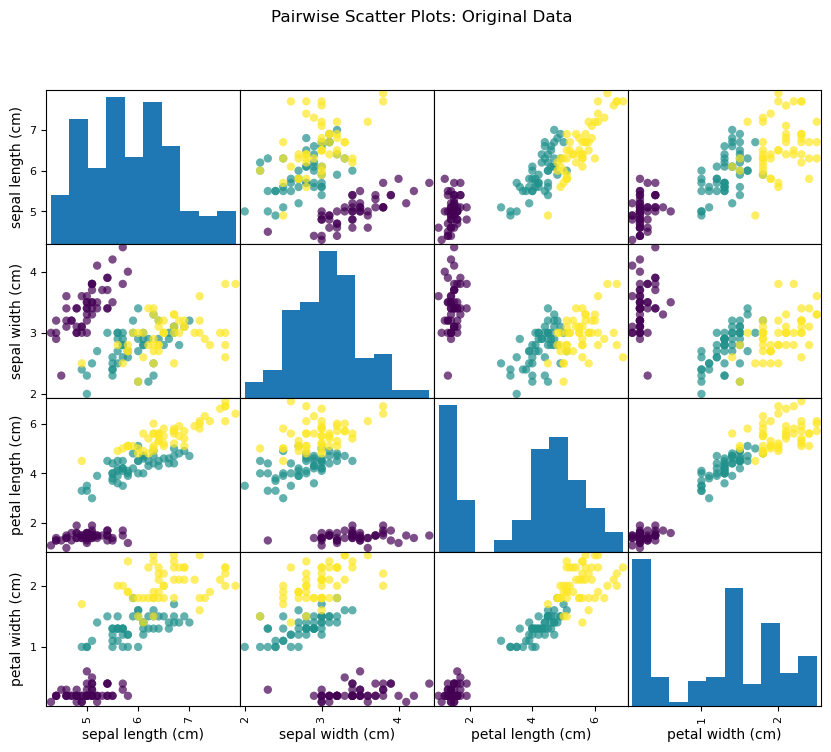

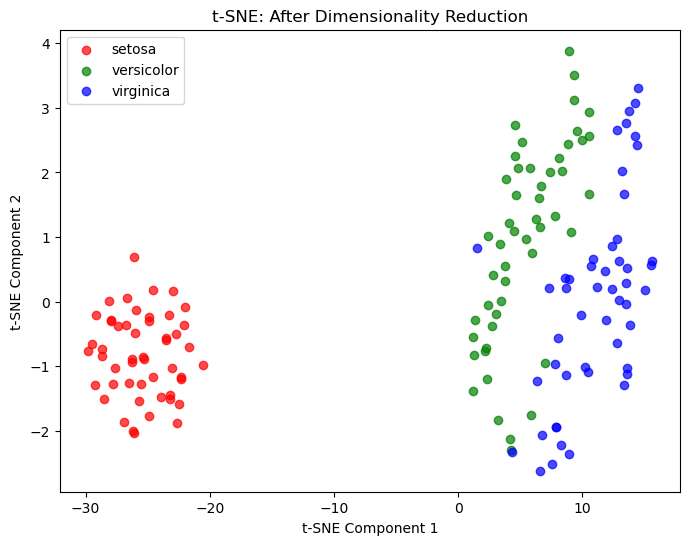

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
species = iris.target_names

# Exploration: Create DataFrame and print summaries
df = pd.DataFrame(X, columns=feature_names)
df['species'] = pd.Categorical.from_codes(y, species)

print("Dataset shape:", df.shape)
print("\nClass distribution:")
print(df['species'].value_counts())
print("\nMeans by species:")
print(df.groupby('species')[feature_names].mean())
print("\nSummary statistics:")
print(df[feature_names].describe())
print("\nCorrelation matrix:")
print(df[feature_names].corr())

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Before t-SNE: Pairwise scatter plot matrix
plt.figure(figsize=(10, 8))
pd.plotting.scatter_matrix(df[feature_names], c=y, figsize=(10, 8), diagonal='hist', alpha=0.7, marker='o')
plt.suptitle('Pairwise Scatter Plots: Original Data')
plt.show()

# After t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
for i, color in enumerate(colors):
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], c=color, label=species[i], alpha=0.7)
plt.title('t-SNE: After Dimensionality Reduction')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()


In [9]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

data = {'Employee id': [10, 20, 15, 25, 30],
        'Gender': ['M', 'F', 'F', 'M', 'F'],
        'Remarks': ['Good', 'Nice', 'Good', 'Great', 'Nice'],
        }
df = pd.DataFrame(data)
print(f"Employee data : \n{df}")

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(df[categorical_columns])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

df_encoded = pd.concat([df, one_hot_df], axis=1)

df_encoded = df_encoded.drop(categorical_columns, axis=1)
print(f"Encoded Employee data : \n{df_encoded}")

Employee data : 
   Employee id Gender Remarks
0           10      M    Good
1           20      F    Nice
2           15      F    Good
3           25      M   Great
4           30      F    Nice
Encoded Employee data : 
   Employee id  Gender_F  Gender_M  Remarks_Good  Remarks_Great  Remarks_Nice
0           10       0.0       1.0           1.0            0.0           0.0
1           20       1.0       0.0           0.0            0.0           1.0
2           15       1.0       0.0           1.0            0.0           0.0
3           25       0.0       1.0           0.0            1.0           0.0
4           30       1.0       0.0           0.0            0.0           1.0
